## Лабораторная работа №1 по курсу "Методы оптимизации"


**Выполнила:** Артюшина Анастасия

**Группа:** РК6-61Б


In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import csv
import math as math

Чтение заданной выборки:

In [2]:
nodes = []
with open('lab1.csv', newline='') as File:  
    reader = csv.reader(File)
    for row in reader:
        point = " ".join(row).split(" ")
        nodes.append((float(point[0]), float(point[1]))) 
    nodes.sort()    

Построение кусочно-линейной функции по заданным узлам:

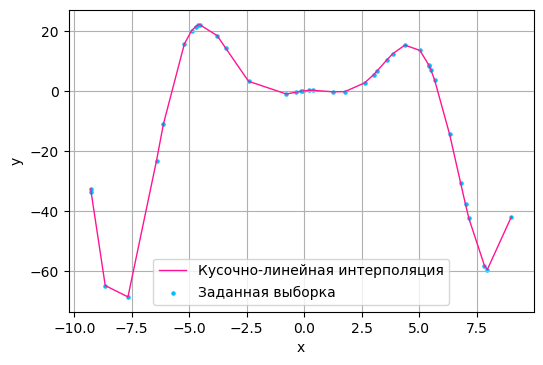

In [3]:
fig, axes = plt.subplots(nrows=1, ncols=1, dpi=100)
x = []
y = []
for i in nodes:
    x.append(i[0])
    y.append(i[1])
axes.plot(x, y, color="deeppink", linewidth=1.0, label="Кусочно-линейная интерполяция") 
plt.scatter(x, y,s = 5, color="deepskyblue", label="Заданная выборка")
axes.set_xlabel("x")
axes.set_ylabel("y")
axes.grid()
axes.legend()
plt.show()

В качестве аппроксимирующей выберем функцию **f(x) = (-ax^2+bx+c)cos(dx)**

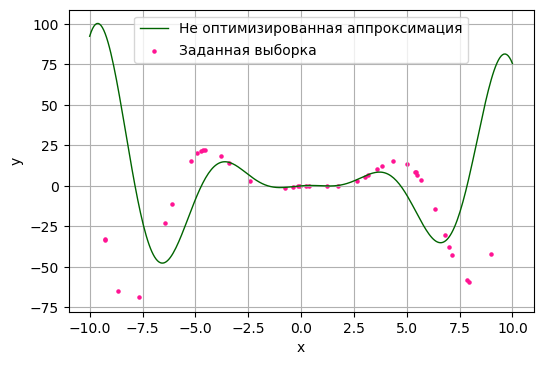

In [4]:
x_func = np.linspace(-10,10,300)
y_func = ( - x_func**2 + x_func ) * np.cos(x_func)

fig, axes = plt.subplots(nrows=1, ncols=1, dpi=100)
axes.plot(x_func, y_func, color="darkgreen", linewidth=1.0, label="Не оптимизированная аппроксимация") 
plt.scatter(x, y,s = 5, color="deeppink", label="Заданная выборка")
axes.set_xlabel("x")
axes.set_ylabel("y")
axes.grid()
axes.legend()
plt.show()

Для поиска оптимальных параметров a,b,c,d, при которых аппроксимация будет наиболее точной, воспользуемся пакетом математических процедур SciPy

In [5]:
def func (x,a,b,c,d):
    return (-a*x**2+b*x+c)*np.cos(d*x)

In [6]:
values = curve_fit(func,x,y)[0]
a = values[0]
b = values[1]
c = values[2]
d = values[3]
print('Значения параметров:')
print('a =', a)
print('b =', b)
print('c =', c)
print('d =', d)

Значения параметров:
a = 1.0599999997683924
b = 0.8499999999444029
c = -8.186093974317582e-10
d = 0.8099999999963633


Анализируя полученные коэффициенты, можно заметить, что параметр **'c'** пренебрежимо мал, поэтому не будем его учитывать при построении оптимизированной аппроксимирующей функции, и пересчитаем параметры:


In [7]:
def new_func (x,a,b,d):
    return (-a*x**2+b*x)*np.cos(d*x)
values = curve_fit(new_func,x,y)[0]
a = values[0]
b = values[1]
d = values[2]
print('Значения параметров:')
print('a =', a)
print('b =', b)
print('d =', d)


Значения параметров:
a = 1.0600000000000005
b = 0.8500000000000004
d = 0.81


Таким образом, получаем: 

**f(x) = (-1.06x^2+0.85x)cos(0.81x)**

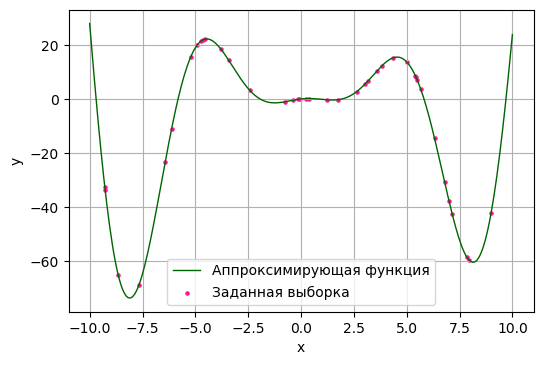

In [8]:
x_opt = np.linspace(-10,10,300)
y_opt = new_func(x_opt,a,b,d)

fig, axes = plt.subplots(nrows=1, ncols=1, dpi=100)
axes.plot(x_opt, y_opt, color="darkgreen", linewidth=1.0, label="Аппроксимирующая функция") 
plt.scatter(x, y,s = 5, color="deeppink", label="Заданная выборка")
axes.set_xlabel("x")
axes.set_ylabel("y")
axes.grid()
axes.legend()
plt.show()

Оценим точность построенной кривой, рассчитав среднеквадратичное и максимальное отклонения от целевой выборки:

In [9]:
standard_deviation = math.sqrt(sum([(y[i] - new_func(x[i], a, b, d)) ** 2 for i in range(len(x))])/len(x))
print(f"Среднеквадратичное отклонение = {standard_deviation}")
max_deviation = max([abs(y[i] - new_func(x[i], a, b,d)) for i in range(len(x))])
print(f"Максимальное отклонение = {max_deviation}")

Среднеквадратичное отклонение = 1.1888715553093813e-14
Максимальное отклонение = 2.842170943040401e-14
